
=== Thuật toán: First Fit ===
Buffer đầy, không thể đặt box 19
Dừng lại: Buffer đầy và không thể đặt được thêm box nào.
Buffer 0: Utilization = 53.90%, Buffered boxes = 0
Dừng lại: Buffer đầy và không thể đặt được thêm box nào.
Buffer 2: Utilization = 63.80%, Buffered boxes = 2
Dừng lại: Buffer đầy và không thể đặt được thêm box nào.
Buffer 4: Utilization = 65.00%, Buffered boxes = 4
Dừng lại: Buffer đầy và không thể đặt được thêm box nào.
Buffer 6: Utilization = 65.00%, Buffered boxes = 6

=== Thuật toán: Best Fit ===
Dừng lại: Buffer đầy và không thể đặt được thêm box nào.
Buffer 0: Utilization = 0.80%, Buffered boxes = 0
Buffer đầy, không thể đặt box 19
Buffer đầy, không thể đặt box 22
Dừng lại: Buffer đầy và không thể đặt được thêm box nào.
Buffer 2: Utilization = 57.90%, Buffered boxes = 2
Buffer đầy, không thể đặt box 19
Buffer đầy, không thể đặt box 22
Buffer đầy, không thể đặt box 25
Buffer đầy, không thể đặt box 26
Dừng lại: Buffer đầy và không thể đặt được thêm box nào.
Buff

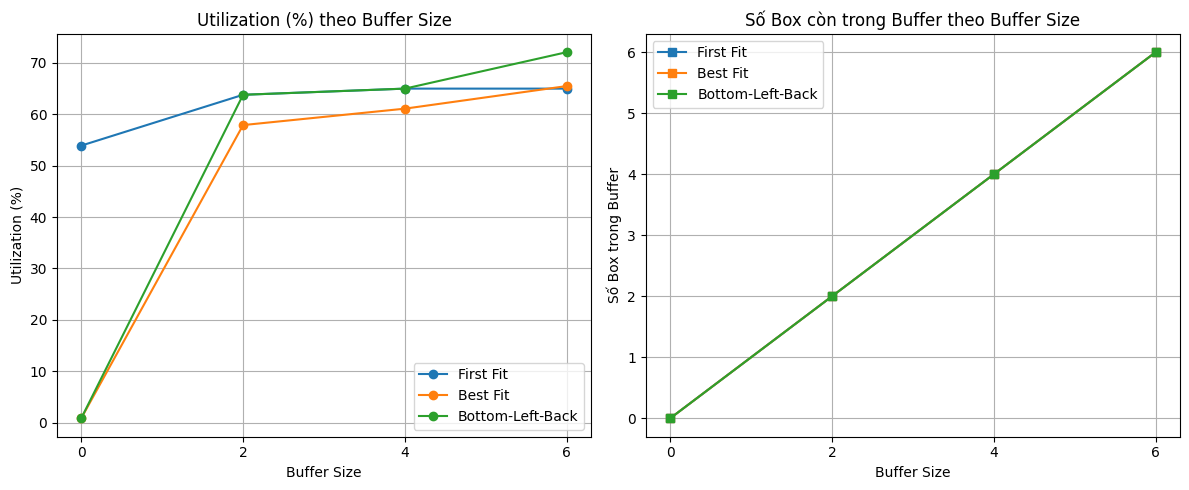

In [1]:
# Import cần thiết
import matplotlib.pyplot as plt
import numpy as np
import copy

from src.heuristics.first_fit import FirstFitBufferPacker
from src.heuristics.best_fit import BestFitBufferPacker
from src.heuristics.bottom_left_back import BottomLeftBackBufferPacker
from src.core.box import Box
from src.utils.generatorBPP import generatorBPP

# Cấu hình
buffer_sizes = [0, 2, 4, 6]
algorithms = {
    "First Fit": FirstFitBufferPacker,
    "Best Fit": BestFitBufferPacker,
    "Bottom-Left-Back": BottomLeftBackBufferPacker
}
# Số lượng box và kích thước bin (ví dụ)
num_boxes = 100
bin_size = [10, 10, 10]
seed = 42

# Tạo dictionary lưu kết quả
results_util = {name: [] for name in algorithms}
results_buffer = {name: [] for name in algorithms}

# Lặp qua từng thuật toán và từng buffer size:
for alg_name, PackerClass in algorithms.items():
    print(f"\n=== Thuật toán: {alg_name} ===")
    for buf_size in buffer_sizes:
        # Sinh dữ liệu mới cho mỗi lần chạy (để đảm bảo tính độc lập)
        gen = generatorBPP()
        gen._generator_1(numOfBox=num_boxes, bin_size=bin_size, seed=seed)
        boxes_raw = gen.box_size
        
        # Tạo danh sách Box từ dữ liệu generator
        boxes = [Box(*dims) for dims in boxes_raw]
        
        packer = PackerClass(binsize=tuple(bin_size), buffer_size=buf_size, boxes=copy.deepcopy(boxes))
        
        # Chạy thuật toán đặt box
        packer.pack_all_boxes()
        
        # Lưu kết quả:
        util = packer.utilization() * 100  # chuyển về %
        results_util[alg_name].append(util)
        
        # Số box vẫn còn trong buffer:
        buf_count = len(packer.get_buffered_boxes())
        results_buffer[alg_name].append(buf_count)
        
        print(f"Buffer {buf_size}: Utilization = {util:.2f}%, Buffered boxes = {buf_count}")

# Vẽ biểu đồ sử dụng
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for alg_name in algorithms:
    plt.plot(buffer_sizes, results_util[alg_name], marker='o', label=alg_name)
plt.title("Utilization (%) theo Buffer Size")
plt.xlabel("Buffer Size")
plt.ylabel("Utilization (%)")
plt.xticks(buffer_sizes)
plt.grid(True)
plt.legend()

# Vẽ biểu đồ số box còn lại trong buffer
plt.subplot(1, 2, 2)
for alg_name in algorithms:
    plt.plot(buffer_sizes, results_buffer[alg_name], marker='s', label=alg_name)
plt.title("Số Box còn trong Buffer theo Buffer Size")
plt.xlabel("Buffer Size")
plt.ylabel("Số Box trong Buffer")
plt.xticks(buffer_sizes)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
